<a href="https://colab.research.google.com/github/s26673/POSI_MON1/blob/main/Cwiczenia7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ćwiczenia 7

## Wprowadzenie

### Skalowanie danych

Skalowanie danych to proces przekształcania wartości cech (features), aby znajdowały się w podobnym zakresie.  
Celem jest poprawa działania algorytmów uczących się (np. regresji liniowej, k-NN, SVM), które są wrażliwe na różnice w skali danych.

<br>

Skalowanie **nie zmienia kształtu rozkładu danych**, ale zapewnia porównywalność cech, co **przyspiesza i stabilizuje** proces uczenia modeli.


#### Najczęstsze metody skalowania

##### **Standaryzacja (Standardization / Z-score Normalization)**

Przekształca dane tak, by miały **średnią 0** i **odchylenie standardowe 1**:

$$
x' = \frac{x - \mu}{\sigma}
$$

gdzie:  
- $ x $ – oryginalna wartość,  
- $ \mu $ – średnia wartości cechy,  
- $ \sigma $ – odchylenie standardowe.



##### **Normalizacja (Min-Max Scaling)**

Przekształca dane do zadanego przedziału (zazwyczaj $ [0, 1] $):

$$
x' = \frac{x - x_{\min}}{x_{\max} - x_{\min}}
$$

gdzie:  
- $ x_{\min} $, $ x_{\max} $ – minimalna i maksymalna wartość cechy.


##### **MaxAbs Scaling**

Używana przy danych zawierających wartości ujemne, skaluje do przedziału $ [-1, 1] $:

$$
x' = \frac{x}{|x_{\max}|}
$$

#### Przykład skalowania danych w Python

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

data = {
    'Wzrost': [160, 170, 180, 190],
    'Waga': [55, 65, 80, 95]
}

df = pd.DataFrame(data)
print(df)

# Standaryzacja (średnia = 0, odchylenie std = 1)
scaler_std = StandardScaler()
df_standard = pd.DataFrame(scaler_std.fit_transform(df), columns=df.columns)

print("\n Dane po standaryzacji:")
print(df_standard)

# Normalizacja (zakres [0, 1])
scaler_minmax = MinMaxScaler()
df_minmax = pd.DataFrame(scaler_minmax.fit_transform(df), columns=df.columns)

print("\n Dane po normalizacji:")
print(df_minmax)


   Wzrost  Waga
0     160    55
1     170    65
2     180    80
3     190    95

 Dane po standaryzacji:
     Wzrost      Waga
0 -1.341641 -1.237179
1 -0.447214 -0.577350
2  0.447214  0.412393
3  1.341641  1.402136

 Dane po normalizacji:
     Wzrost   Waga
0  0.000000  0.000
1  0.333333  0.250
2  0.666667  0.625
3  1.000000  1.000


### Sieć neuronowa

#### Czym jest sieć neuronowa?
**Sieć neuronowa** to model matematyczny inspirowany sposobem działania biologicznego mózgu,
służący do rozpoznawania wzorców i przetwarzania danych. Składa się z warstw połączonych ze sobą
**neuronów** (węzłów), które przekształcają dane wejściowe w dane wyjściowe.

Sieć neuronowa składa się z połączonych ze sobą „neuronów” (czyli prostych jednostek obliczeniowych), ułożonych warstwowo:

- Warstwa wejściowa (input layer) – przyjmuje dane (np. piksele obrazu, liczby, tekst).

- Warstwy ukryte (hidden layers) – przetwarzają dane, ucząc się złożonych zależności i wzorców.

- Warstwa wyjściowa (output layer) – zwraca wynik (np. etykietę klasy, przewidywaną wartość, odpowiedź tekstową).



#### Funkcje aktywacji (przykłady)

- Funkcja sigmoidalna:
  $$
  f(x) = \frac{1}{1 + e^{-x}}
  $$

**Zakres:** $(0, 1)$

**Zalety:**
Dobrze interpretuje się jako „prawdopodobieństwo”.

**Wady:**
Działa słabo przy dużych dodatnich/ujemnych wartościach (zanikanie gradientu).

**Zastosowanie:**
Często w warstwie wyjściowej przy klasyfikacji binarnej.

<br>

- Funkcja ReLU:
  $$
  f(x) = \max(0, x)
  $$

**Zakres:** $[0, ∞)$

**Zalety:**
Szybka, prosta i bardzo skuteczna.
Pomaga uniknąć problemu zanikającego gradientu.

**Wady:**
Może powodować tzw. martwe neurony (gdy wagi sprawiają, że neuron zawsze daje 0).

**Zastosowanie:**
Najczęściej używana w ukrytych warstwach sieci głębokich (CNN, MLP).

<br>

- Softmax

$$
f(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}}
$$

**Zakres:** $ (0, 1)$, a suma wszystkich wyjść = $1$

**Opis:**  
Zamienia wektor wartości na rozkład prawdopodobieństwa.

**Zastosowanie:**  
W warstwie wyjściowej przy klasyfikacji wieloklasowej (np. rozpoznawanie cyfr 0–9).


#### Uczenie sieci neuronowej

Uczenie polega na minimalizacji błędu między przewidywanym a rzeczywistym wynikiem za pomocą algorytmu
**propagacji wstecznej (backpropagation)** i metod optymalizacji, np. **gradientu prostego**.

$$
w_i \leftarrow w_i - \eta \frac{\partial L}{\partial w_i}
$$

gdzie:
- $ \eta $ – współczynnik uczenia,
- $ L $ – funkcja błędu (loss function).

#### Jak sieć uczy się rozwiązywać zadania

Proces uczenia sieci neuronowej można podzielić na kilka kroków:

#### a) Forward propagation (propagacja w przód)

- Dane wejściowe przechodzą przez sieć.  
- Każdy neuron liczy swoją sumę ważoną i stosuje funkcję aktywacji.  
- Otrzymujemy wynik (predykcję).  

#### b) Obliczanie błędu

- Porównujemy wynik sieci z rzeczywistą odpowiedzią (label).  
- Używamy funkcji straty (loss function), np. MSE dla regresji czy cross-entropy dla klasyfikacji.  

#### c) Backpropagation (propagacja wsteczna)

- Obliczamy gradienty funkcji straty względem wag.  
- Wagi są aktualizowane w kierunku minimalizacji błędu (np. metodą gradientu prostego lub z użyciem optymalizatora, np. Adam).  

#### d) Aktualizacja wag

Wagi są zmieniane według reguły:

$$
w_{\text{new}} = w_{\text{old}} - \eta \cdot \frac{\partial L}{\partial w}
$$

gdzie:  

- $\eta$ — learning rate (tempo uczenia),  
- $L$ — funkcja straty.  


#### Przykład klasyfikacji wieloklasowej za pomocą sieci neuronowej w Python

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create MLP model
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, activation='relu', random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Predict and evaluate
y_pred = mlp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Macierz pomyłek:")
print(confusion_matrix(y_test, y_pred))

print("\nRaport klasyfikacji:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9666666666666667
Macierz pomyłek:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



#### Przykład klasyfikacji wieloklasowej w Python (Keras)

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

iris = load_iris()
X = iris.data
y = iris.target

y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Budowa modelu MLP
model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu'))  # warstwa ukryta 1
model.add(Dense(8, activation='relu'))                     # warstwa ukryta 2
model.add(Dense(3, activation='softmax'))                 # warstwa wyjściowa (3 klasy)

# Kompilacja modelu
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=5,
                    verbose=1)

# Ewaluacja modelu
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")


Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.4434 - loss: 1.0644 - val_accuracy: 0.5000 - val_loss: 1.0440
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5213 - loss: 0.9542 - val_accuracy: 0.4583 - val_loss: 0.9634
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6123 - loss: 0.8815 - val_accuracy: 0.5833 - val_loss: 0.8995
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6536 - loss: 0.8284 - val_accuracy: 0.7500 - val_loss: 0.8551
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8043 - loss: 0.7330 - val_accuracy: 0.7917 - val_loss: 0.8175
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7253 - loss: 0.7562 - val_accuracy: 0.8333 - val_loss: 0.7832
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8139 - loss: 0.6887 - val_accuracy: 0.7917 - val_loss: 0.7552
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8306 - loss: 0.6656 - val_accuracy: 0.7917 - val_l

## Zadanie
Dla zbioru danych `load_digits` z modułu `sklearn.datasets` przeprowadź analizę DEA oraz klasyfikację cechy `target` (cyfry 0-9) z wykorzystaniem sieci neuronowej.

<br>

Przykład ładowania danych:

```
import pandas as pd
from sklearn.datasets import load_breast_cancer

data = load_digits()

X = digits.data       # cechy (64 piksele)
y = digits.target     # etykiety (cyfry 0-9)
```

Pamiętaj o:
- sprawdzeniu, czy są brakujące dane,
- sprawdzeniu czy jest korelacja między cechami,
- wartościach odstających,
- sprawdzeniu poprawności modulu za pomocą metryk,
- wizualizacji danych oraz wyników.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [13]:
# Wczytanie danych
digits = load_digits()
X = digits.data        # 64 piksele
y = digits.target      # cyfry 0-9

df = pd.DataFrame(X)
df['target'] = y

df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [14]:
df.isna().sum()

,0
0,0
1,0
2,0
3,0
4,0
...,...
60,0
61,0
62,0
63,0


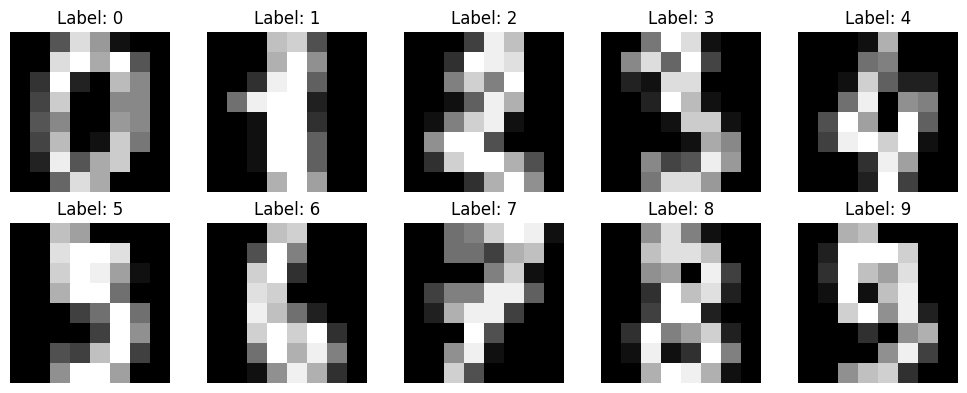

In [15]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(digits.images[i], cmap="gray")
    plt.title(f"Label: {digits.target[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

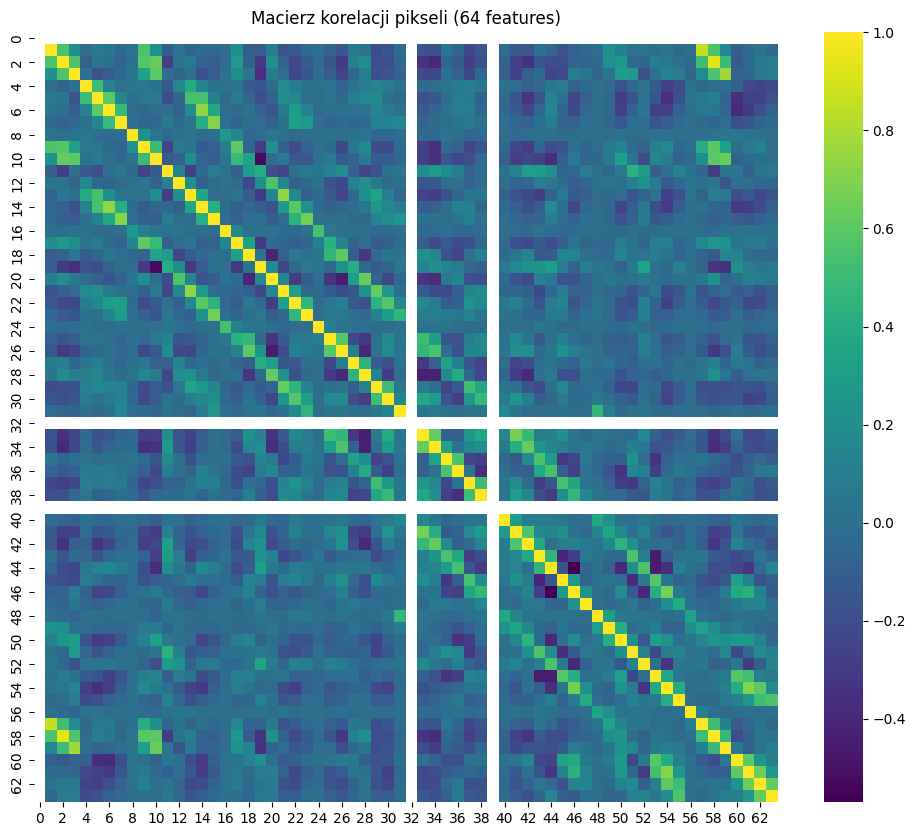

In [16]:
plt.figure(figsize=(12, 10))
sns.heatmap(pd.DataFrame(X).corr(), cmap="viridis")
plt.title("Macierz korelacji pikseli (64 features)")
plt.show()

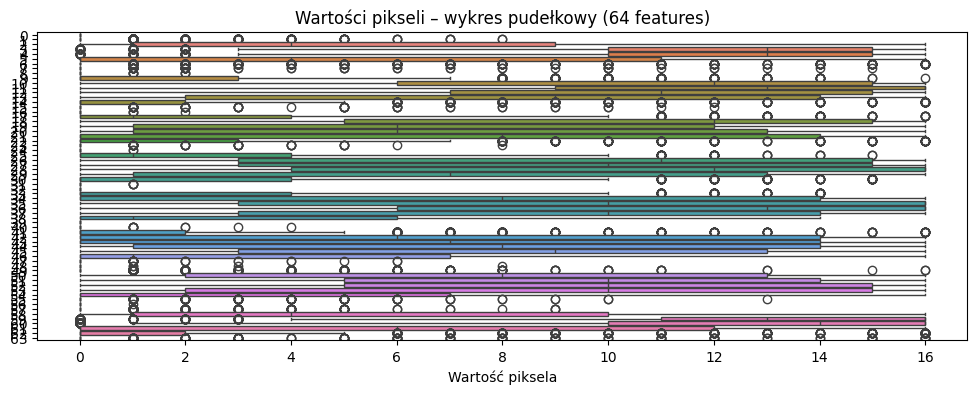

In [17]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=df.drop(columns=["target"]), orient="h")
plt.title("Wartości pikseli – wykres pudełkowy (64 features)")
plt.xlabel("Wartość piksela")
plt.show()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32), #2 warstwy ukryte - 1. 64 neurony, 2 - 32 neurony
    activation='relu', #funckja aktywacji w warstwach ukrytych
    solver='adam',
    max_iter=300, #maksymalnie 300 epok
    random_state=42
)

print("Trenowanie modelu…")
mlp.fit(X_train, y_train)

Trenowanie modelu…


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)

In [20]:
y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nDokładność modelu (Accuracy): {accuracy:.4f}\n")

print("Raport klasyfikacji:")
print(classification_report(y_test, y_pred))


Dokładność modelu (Accuracy): 0.9667

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.92      0.92      0.92        36
           2       0.95      1.00      0.97        35
           3       0.97      0.97      0.97        37
           4       0.95      1.00      0.97        36
           5       0.97      1.00      0.99        37
           6       1.00      0.94      0.97        36
           7       0.97      1.00      0.99        36
           8       0.94      0.91      0.93        35
           9       1.00      0.94      0.97        36

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



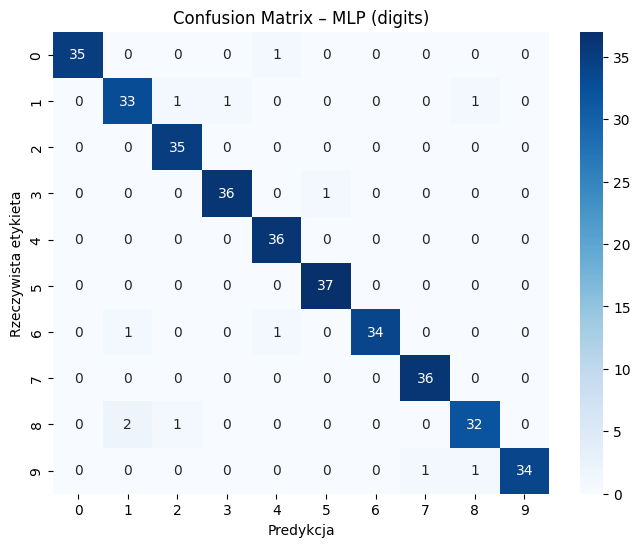

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix – MLP (digits)")
plt.xlabel("Predykcja")
plt.ylabel("Rzeczywista etykieta")
plt.show()

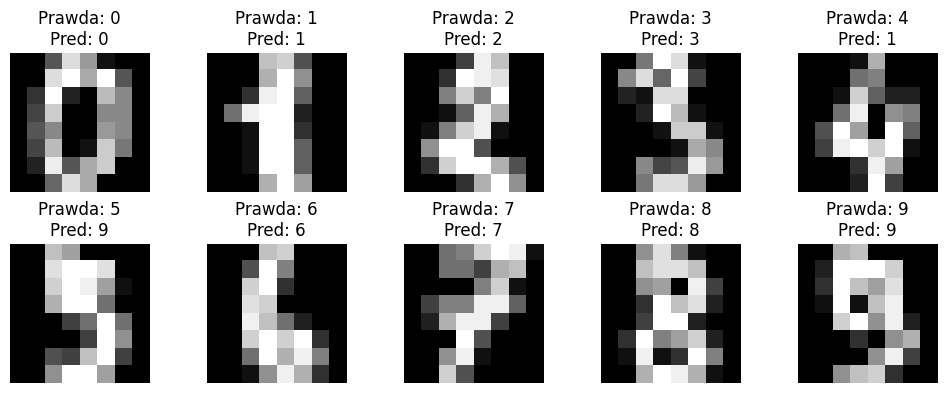

In [22]:
plt.figure(figsize=(10, 4))
for index, img_idx in enumerate(range(10)):
    plt.subplot(2, 5, index + 1)
    plt.imshow(digits.images[img_idx], cmap="gray")
    plt.title(f"Prawda: {y[img_idx]}\nPred: {mlp.predict([X[img_idx]])[0]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


In [9]:
from sklearn.datasets import load_digits  # Zmiana z load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Ładowanie danych
data = load_digits()  # Zmiana zbioru danych

X = data.data
y = data.target

# 2. Podział na trening/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Skalowanie (Kluczowe dla sieci neuronowych)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Tworzenie modelu MLP
# Zmieniono hidden_layer_sizes na nieco większe (64, 32), ponieważ cyfry (64 piksele)
# są bardziej złożone niż kwiaty Iris (4 cechy). Reszta parametrów bez zmian.
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, activation='relu', random_state=42)

# 5. Trenowanie
mlp.fit(X_train, y_train)

# 6. Predykcja i ewaluacja
y_pred = mlp.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

print("Macierz pomyłek:")
print(confusion_matrix(y_test, y_pred))

print("\nRaport klasyfikacji:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9805555555555555
Macierz pomyłek:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  1  0 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  0  0  0  0  0  0  0 30  0]
 [ 0  0  0  1  0  0  0  0  1 38]]

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       0.98      1.00      0.99        46
           5       0.96      0.96      0.96        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      1.00      0.98        30
           9       0.97      0.95      0.96        40

    a

In [11]:
import numpy as np
from sklearn.datasets import load_digits # Zmiana z load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# 1. Ładowanie danych
digits = load_digits() # Zmiana zbioru
X = digits.data
y = digits.target

# 2. Konwersja etykiet na one-hot encoding (wymagane dla categorical_crossentropy)
# Zamienia np. cyfrę 5 na wektor [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
y = to_categorical(y)

# 3. Podział danych
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Skalowanie
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Budowa modelu MLP (Keras)
model = Sequential()
# input_shape zmienione na (64,), bo mamy 64 piksele
# Zwiększono też nieco liczbę neuronów w warstwach ukrytych dla lepszego efektu
model.add(Dense(64, input_shape=(64,), activation='relu'))  # warstwa ukryta 1
model.add(Dense(32, activation='relu'))                     # warstwa ukryta 2
# Warstwa wyjściowa musi mieć 10 neuronów (cyfry 0-9)
model.add(Dense(10, activation='softmax'))                  # warstwa wyjściowa




# 6. Kompilacja modelu
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 7. Trenowanie
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32, # Zwiększono batch_size, bo danych jest więcej
                    verbose=1)

# 8. Ewaluacja modelu
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2076 - loss: 2.2105 - val_accuracy: 0.6146 - val_loss: 1.5487
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7080 - loss: 1.3325 - val_accuracy: 0.8403 - val_loss: 0.8976
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8385 - loss: 0.7785 - val_accuracy: 0.9201 - val_loss: 0.4901
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9033 - loss: 0.4246 - val_accuracy: 0.9340 - val_loss: 0.3117
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9279 - loss: 0.2896 - val_accuracy: 0.9479 - val_loss: 0.2257
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9586 - loss: 0.2039 - val_accuracy: 0.9514 - val_loss: 0.1819
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9756 - loss: 0.1346 - val_accuracy: 0.9688 - val_loss: 0.1455
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9771 - loss: 0.1260 - val_accuracy: 0.9688 - val_loss: 0.1